# GEC Data Science Program
## Level 1, Lab 1

### Intro to project

Zillow’s Home Value Prediction (Zestimate) 
https://www.kaggle.com/c/zillow-prize-1

Project Handout


### Data download

https://www.kaggle.com/c/zillow-prize-1/data

In Lab sessions we use Titanic Data to demonstrate concepts:
https://www.kaggle.com/c/titanic

### Environment Setup

We will be using Anaconda with Python 2.7 or 3.6 (Minor changes might be needed for Python 3.6).
https://www.anaconda.com/download/

### Hello world examples

In [1]:
import numpy as np

In [115]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [116]:
np.random.rand(10)

array([ 0.98630187,  0.58776499,  0.08267132,  0.10691536,  0.26037317,
        0.55229346,  0.37167873,  0.6396315 ,  0.23733074,  0.69007597])

In [117]:
np.random.rand(10,3)

array([[ 0.97224682,  0.96724933,  0.79212211],
       [ 0.43655503,  0.76693767,  0.15898077],
       [ 0.67769287,  0.52693354,  0.87711631],
       [ 0.79765437,  0.46224877,  0.06335403],
       [ 0.26304036,  0.71149808,  0.30605255],
       [ 0.31890992,  0.95965864,  0.63026629],
       [ 0.22409218,  0.665533  ,  0.69510165],
       [ 0.04299287,  0.45720103,  0.30829101],
       [ 0.32732431,  0.29381744,  0.62829906],
       [ 0.90847511,  0.64812182,  0.21411437]])

### Pandas review

#### Working with data frames

In [2]:
import pandas as pd

In [119]:
d=pd.DataFrame(data=np.random.rand(100,3),columns=['A','B','C'])

In [120]:
d.head()

,A,B,C
0,0.128480,0.888697,0.484726
1,0.537980,0.212678,0.773996
2,0.917903,0.827968,0.615234
3,0.072134,0.792589,0.652982
4,0.854442,0.915583,0.160273


### Loading data

In [3]:
d=pd.read_csv("train.csv")

In [4]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Q: How to change index to "PassengerId"?

In [124]:
d.set_index("PassengerId", inplace=True)

In [125]:
d.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Q: how many data points (rows) do we have?

In [126]:
len(d)

891

#### General information about the dataset

In [127]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Q: What's the mean age of passengers?

In [131]:
d["Age"]

In [130]:
d.Age.mean()

29.69911764705882

#### Q: How many male/female passengers are there?

In [133]:
d.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

#### Quick summary of all numerical variables

In [134]:
d.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Q: How many (unique) Passenger Classes 'Pclass' are there?

In [135]:
d.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Q: How many passengers survived?

In [136]:
d.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Q: How much missing data is there?

In [ ]:
#use info function

#### Q: How many females between 20 and 30?

In [145]:
len(d[(d.Sex == 'female') & (d.Age>=20) & (d.Age<=30)])

83

### Visualizations

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
%matplotlib inline 
#notebook

In [6]:
a=np.random.randn(1000)

In [7]:
b=np.random.randn(1000)

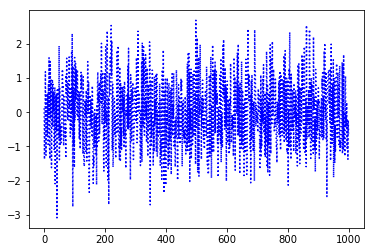

In [15]:
plt.plot(a,':b')

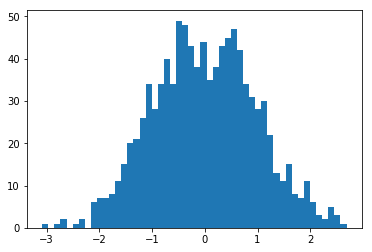

In [18]:
plt.hist(a, bins=50);

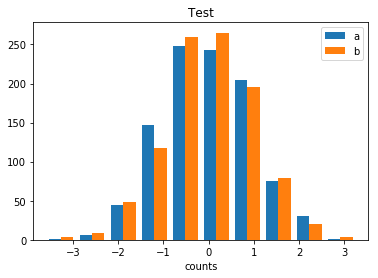

In [24]:
plt.hist([a,b]);
plt.legend(["a","b"]);
plt.xlabel("counts");
plt.title("Test");

### Exploring data

#### Histrogram of Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ad5ac10>]], dtype=object)

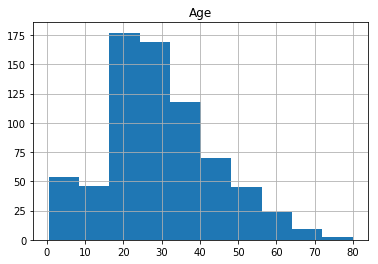

In [29]:
d.hist("Age")

#### Q: What is the distribution of Age in 'survided' vs 'not survived' groups?

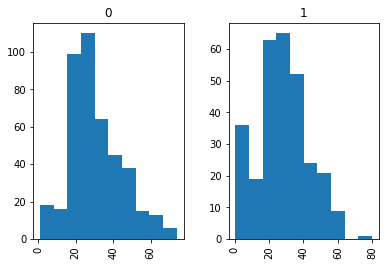

In [31]:
d.hist(column='Age',by='Survived');

In [32]:
idx_died = d.Survived == 0
idx_survived = d.Survived == 1
age = d.Age.fillna(d.Age.mean())

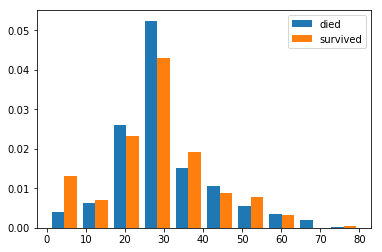

In [38]:
plt.hist([age[idx_died], age[idx_survived]], normed=True);
plt.legend(['died','survived']);

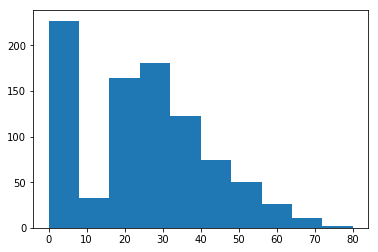

In [40]:
plt.hist(d.Age.fillna(0));

#### Q: What is the distribution (histogram) of "Embarked"?

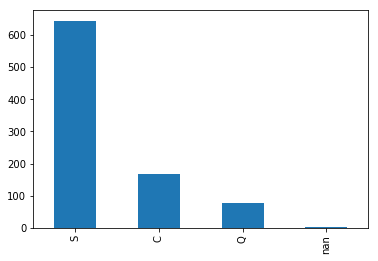

In [48]:
d.Embarked.value_counts(dropna=False).plot.bar();

### Joining Tables

In [49]:
d1=d[["PassengerId","Name"]]
d2=d[["PassengerId","Age"]].loc[np.random.randint(0,len(d),size=50)]

In [50]:
d1.head()

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"


In [51]:
d2.head()

,PassengerId,Age
92,93,46.0
775,776,18.0
403,404,28.0
341,342,24.0
804,805,27.0


In [52]:
#merge is similar to SQL join
d3=d1.merge(d2,on="PassengerId")

In [53]:
d3

,PassengerId,Name,Age
0,43,"Kraeff, Mr. Theodor",NaN
1,47,"Lennon, Mr. Denis",NaN
2,60,"Goodwin, Master. William Frederick",11.0
3,83,"McDermott, Miss. Brigdet Delia",NaN
4,93,"Chaffee, Mr. Herbert Fuller",46.0
5,110,"Moran, Miss. Bertha",NaN
6,158,"Corn, Mr. Harry",30.0
7,168,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",45.0
8,169,"Baumann, Mr. John D",NaN
9,179,"Hale, Mr. Reginald",30.0


### *Q: How many different passenger 'titles' are there? What is the distribution?

In [5]:
d["title"]=d.Name.map(lambda x: x.split('.')[0].split(',')[1].strip())

In [12]:
title_counts = d.title.value_counts()

In [13]:
title_counts

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: title, dtype: int64

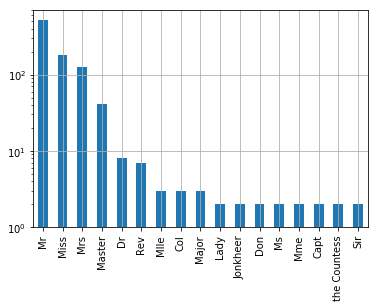

In [14]:
title_counts.plot.bar(log=True, grid='on');